In [22]:
from initial import plot_fft_vertical_horizontal, plot_signals_interactive, get_data_for_participant
from scipy import signal
import pandas as pd

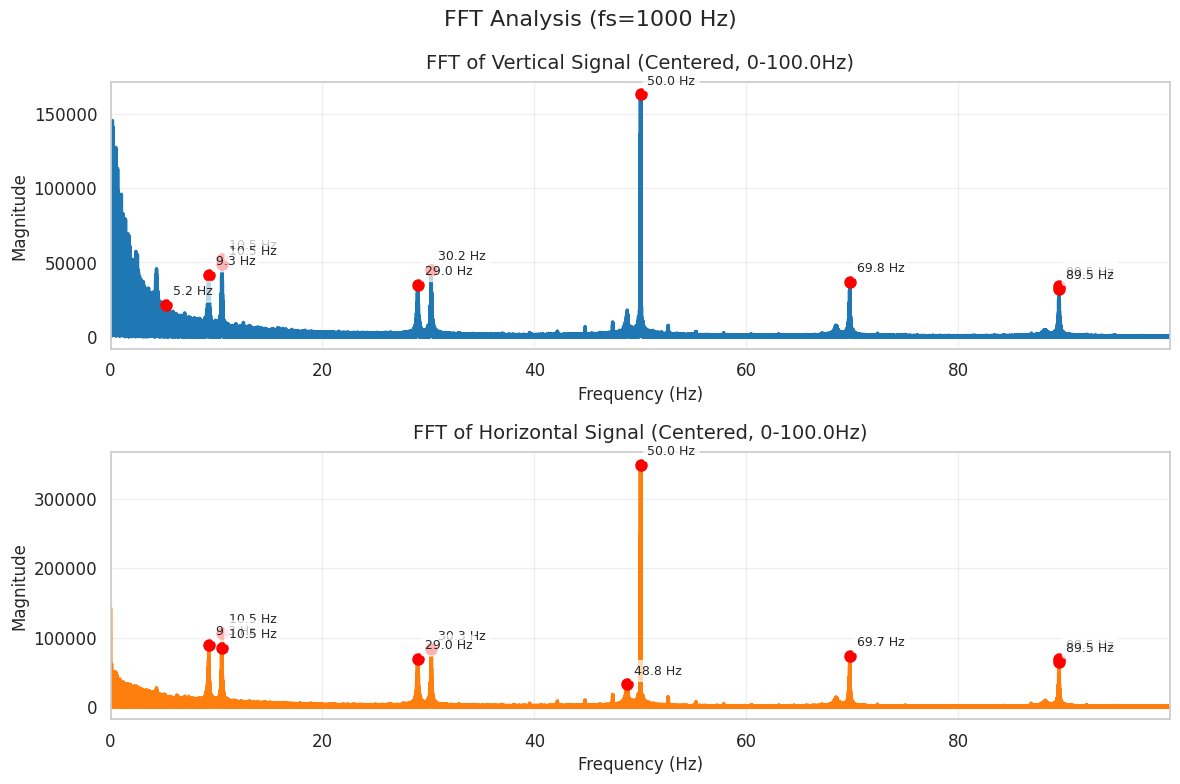

In [3]:
df_final = get_data_for_participant(1, "data/raw/")

plot_fft_vertical_horizontal(df_final["horizontal_value"], df_final["vertical_value"], fs=1000,disp_peaks=True)

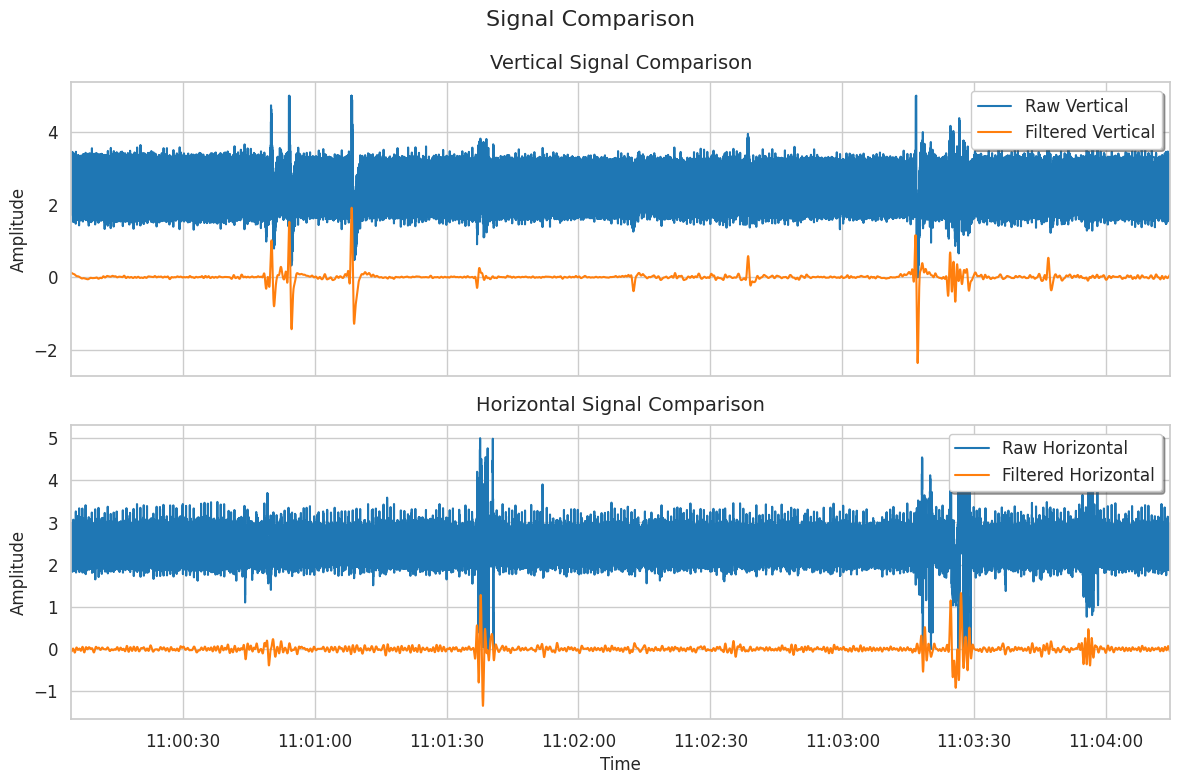

In [21]:
all_data = df_final.resample("1ms").nearest(limit=2).fillna(2.5)
fs = 1 / pd.Series(all_data.index.diff().total_seconds()).median()
filter_order = 4

sos = signal.butter(filter_order, 7.5, btype="lowpass", analog=False, output='sos', fs=fs)

all_data['vertical_filtered'] = signal.sosfilt(sos, all_data['vertical_value'])
all_data['horizontal_filtered'] = signal.sosfilt(sos, all_data['horizontal_value'])

all_data = all_data.resample("5ms").mean()

lowcut_freq = 0.5
highcut_freq = 7.5
filter_order = 5

sos = signal.butter(filter_order, [lowcut_freq, highcut_freq], btype='band', analog=False, output='sos', fs=fs)

all_data['vertical_filtered'] = signal.sosfiltfilt(sos, all_data['vertical_value'])
all_data['horizontal_filtered'] = signal.sosfiltfilt(sos, all_data['horizontal_value'])


plot_signals_interactive(all_data[10000:], n_samples=50000)